In [2]:
import pickle

# Closed World 데이터 로드
TOTAL_MONITERED_URLS = 19000  # monitered 파일의 총 데이터 개수
with open(r'C:/Users/bje57/Downloads/mon_standard.pkl', 'rb') as f_mon:
    monitored_data = pickle.load(f_mon)

In [3]:
# Open World 데이터 로드
TOTAL_UNMONITERED_URLS = 10000  # unmonitered 파일의 총 데이터 개수
with open(r'C:/Users/bje57/Downloads/unmon_standard10.pkl', 'rb') as f_unmon:
    unmonitored_data = pickle.load(f_unmon)

In [4]:
import numpy as np

USE_SUBLABEL = False
URL_PER_SITE = 10
TOTAL_URLS = 950

timestamp_c = [] 
#size_c = [] 
y_c = []
yb_c =[] # 1 로 초기화

med_c = [] # med feature
#burst_c = [] # burst feature

for i in range(TOTAL_URLS): #950에서 시작
    if USE_SUBLABEL: #false면
        label = i
    else: #true면
        label = i // URL_PER_SITE # Calculate which site's URL the current URL being processed belongs to and set that value as the label. Thus, URLs fetched from the same site are labeled identically.
    for sample in monitored_data[i]:
        #size_seq = []
        time_seq = []
        #burst_seq = []
        med_c_seq = []
        time_tmp_seq = []
        #burst_sum=0
        burst_check=-1
        for c in sample:
            dr = 1 if c > 0 else -1
            time_seq.append(abs(c))
            #size_seq.append(dr * 512)
            if(burst_check*dr>0) : #양수면 같은 방향이므로 burst 더하기
                time_tmp_seq.append(abs(c))
                #burst_sum+=dr*512
            else : #부호가 달라졌다면 이전에 저장한 값 삽입
                #burst_seq.append(burst_sum)
                med_c_seq.append(round(np.median(time_tmp_seq),4))
                burst_check= -1*burst_check
                time_tmp_seq.clear()
                time_tmp_seq.append(abs(c))
                #burst_sum=dr*512
                
        #burst_seq.append(burst_sum) #마지막 데이터 넣기
        med_c_seq.append(np.median(time_tmp_seq))
        
        #burst_c.append(burst_seq)
        med_c.append(med_c_seq)
        timestamp_c.append(time_seq)
        #size_c.append(size_seq)
        y_c.append(label)
        yb_c.append(1)
        
size = len(y_c)
print(f'Total samples: {size}')

Total samples: 19000


In [5]:
timestamp_o = [] # Array to store instances (timestamps) - 10,000 instances, e.g., [[0.0, 0.5, 3.4, ...], [0.0, 4.5, ...], [0.0, 1.5, ...], ... [... ,45.8]]
#size_o = [] # Array to store instances (direction*size) - size information
y_o = [] # -1 로 초기화
med_o = []
#burst_o = []
for i in range(5000):
    #size_seq = []
    time_seq = []
    #burst_seq = []
    med_o_seq = []
    time_tmp_seq = []
    #burst_sum=0
    burst_check=-1
    for c in unmonitored_data[i]:
        dr = 1 if c > 0 else -1
        time_seq.append(abs(c))
        #size_seq.append(dr * 512) # In the pickle file, there is no size information, so the conversion code is set to multiply by 512 uniformly.
        if(burst_check*dr>0) : #양수면 같은 방향이므로 burst 더하기
            time_tmp_seq.append(abs(c))
            #burst_sum+=dr*512
        else : #부호가 달라졌다면 이전에 저장한 값 삽입
            #burst_seq.append(burst_sum)
            med_o_seq.append(round(np.median(time_tmp_seq),4))
            burst_check= -1*burst_check
            time_tmp_seq.clear()
            time_tmp_seq.append(abs(c))
            #burst_sum=dr*512
                
    #burst_seq.append(burst_sum) #마지막 데이터 넣기
    med_o_seq.append(np.median(time_tmp_seq))    
    #burst_o.append(burst_seq)
    med_o.append(med_o_seq)
    timestamp_o.append(time_seq)
    #size_o.append(size_seq)
    y_o.append(-1)


In [6]:
print(timestamp_o[0])
print(med_o[0])

[0.0, 0.13, 0.13, 0.36, 0.83, 1.1, 1.1, 1.35, 1.35, 2.1, 2.1, 2.22, 2.35, 2.35, 2.35, 2.47, 2.47, 2.58, 2.58, 2.58, 2.69, 2.69, 2.69, 2.69, 2.69, 2.69, 2.7, 2.7, 2.81, 2.81, 2.81, 2.81, 2.92, 2.92, 2.92, 2.92, 2.92, 2.92, 2.92, 2.92, 2.92, 2.92, 3.02, 3.02, 3.13, 3.13, 3.13, 3.13, 3.13, 3.24, 3.35, 3.35, 3.35, 3.46, 3.46, 3.61, 3.61, 3.78, 4.1, 4.1, 4.1, 4.1, 4.1, 4.1, 4.18, 4.18, 4.18, 4.52, 4.52, 4.52, 4.66, 4.66, 4.66, 4.66, 4.66, 4.66, 4.66, 4.75, 4.75, 4.75, 4.75, 4.75, 4.75, 4.75, 4.75, 4.75, 4.75, 4.75, 4.75, 4.75, 4.75, 4.77, 4.77, 4.84, 4.84, 4.84, 4.84, 4.84, 4.84, 4.84, 4.85, 4.85, 4.85, 4.85, 4.85, 4.85, 4.85, 4.88, 4.88, 4.88, 4.88, 4.88, 4.88, 4.88, 4.88, 4.96, 4.99, 4.99, 4.99, 5.45, 5.45, 5.45, 5.45, 5.45, 5.45, 5.45, 5.56, 5.56, 5.56, 5.56]
[0.065, 0.13, 0.36, 0.83, 1.1, 1.1, 1.35, 2.1, 2.35, 2.35, 2.47, 2.47, 2.58, 2.58, 2.69, 2.7, 2.81, 2.81, 2.92, 2.92, 3.02, 3.02, 3.13, 3.13, 3.35, 3.35, 3.535, 3.78, 4.1, 4.18, 4.75, 4.84, 4.88, 4.96, 5.45]


# timestamp

In [7]:
#Closed World와 Open World 데이터 합치기
timestamp = timestamp_c + timestamp_o
Yb = yb_c + y_o #이진 분류를 위한 y
Ym = y_c + y_o #multi 분류를 위한 y

In [8]:
max_length = max(max(len(arr) for arr in timestamp), max(len(arr) for arr in timestamp))

# 배열 크기 통일
def pad_sequence(sequence, max_length):
    return sequence + [0] * (max_length - len(sequence))

timestamp = [pad_sequence(arr, max_length) for arr in timestamp]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(timestamp, Yb, test_size=0.2, random_state=42)

In [10]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(timestamp, Ym, test_size=0.2, random_state=42)

# random forest

최적의 하이퍼파라미터: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
최적 모델의 정확도: 0.9064583333333334


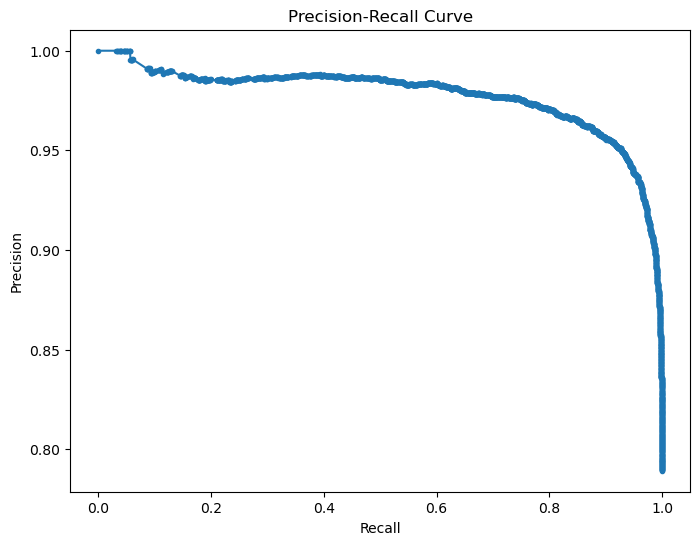

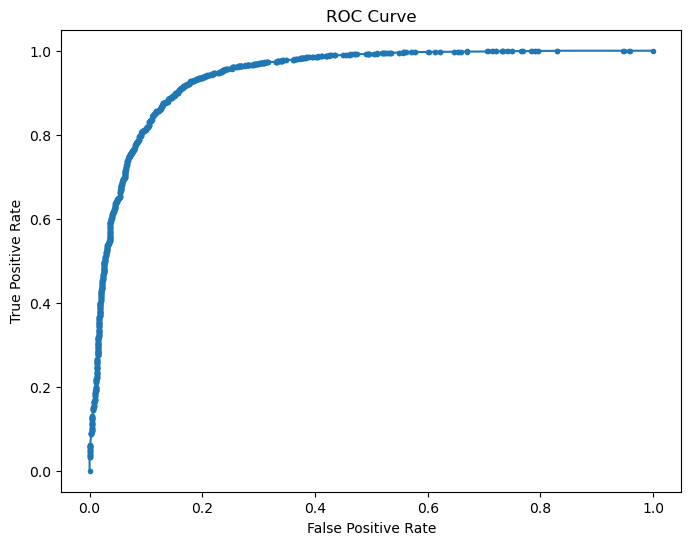

True Positive Rate: 0.9820485744456178
False Positive Rate: 0.37648221343873517
Precision: 0.9070958302852963


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, auc, precision_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

rf_binary = RandomForestClassifier(random_state=42)

# 그리드 서치를 위한 하이퍼파라미터 후보군
param_grid = {
    'n_estimators': [50, 100],       # 트리 개수 후보
    'max_depth': [None],         # 최대 깊이 후보
    'min_samples_split': [2, 5],     # 노드 분할 최소 샘플 수
    'min_samples_leaf': [1]        # 리프 노드 최소 샘플 수
}

grid_search = GridSearchCV(estimator=rf_binary, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델로 예측
best_rf_binary = grid_search.best_estimator_
y_pred_binary = best_rf_binary.predict(X_test)

# 최적의 모델로 정확도 계산
accuracy_binary = accuracy_score(y_test, y_pred_binary)
print(f"최적 모델의 정확도: {accuracy_binary}")

# 이진 분류 모델 평가 지표
conf_matrix_binary = confusion_matrix(y_test, y_pred_binary)
tn, fp, fn, tp = conf_matrix_binary.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
precision = precision_score(y_test, y_pred_binary)

# Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, best_rf_binary.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# ROC Curve
fpr_curve, tpr_curve, _ = roc_curve(y_test, best_rf_binary.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr_curve, tpr_curve)
plt.figure(figsize=(8, 6))
plt.plot(fpr_curve, tpr_curve, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print(f"True Positive Rate: {tpr}")
print(f"False Positive Rate: {fpr}")
print(f"Precision: {precision}")


In [12]:
rf_multi = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_multi, param_grid=param_grid, cv=3, scoring='accuracy')

# 그리드 서치로 모델 피팅
grid_search.fit(Xm_train, ym_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델로 예측
best_rf_multi = grid_search.best_estimator_
y_pred_multi = best_rf_multi.predict(Xm_test)

# 최적의 모델로 정확도 계산
accuracy_multi = accuracy_score(ym_test, y_pred_multi)
print(f"최적 모델의 정확도: {accuracy_multi}")

# classification_report 출력
class_names = [str(i) for i in range(-1, 95)]  # 각 클래스를 -1부터 94까지의 문자열로 표현
report = classification_report(ym_test, y_pred_multi, target_names=class_names)
print("Classification Report:")
print(report)

최적의 하이퍼파라미터: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
최적 모델의 정확도: 0.5170833333333333
Classification Report:
              precision    recall  f1-score   support

          -1       0.53      0.86      0.66      1012
           0       0.40      0.25      0.31        32
           1       0.53      0.35      0.42        48
           2       0.47      0.53      0.49        38
           3       0.50      0.39      0.44        36
           4       0.54      0.56      0.55        36
           5       0.43      0.26      0.32        39
           6       0.33      0.48      0.39        33
           7       0.35      0.22      0.27        41
           8       0.54      0.37      0.44        35
           9       0.29      0.37      0.32        27
          10       0.72      0.52      0.61        44
          11       0.75      0.38      0.50        48
          12       0.52      0.54      0.53        41
          13       0.24      0.09 

# k-nn

C:\Users\bje57\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\bje57\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\bje57\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bje57\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\bje57\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
 

최적의 하이퍼파라미터: {'n_neighbors': 10, 'weights': 'distance'}
최적 모델의 정확도: 0.803125


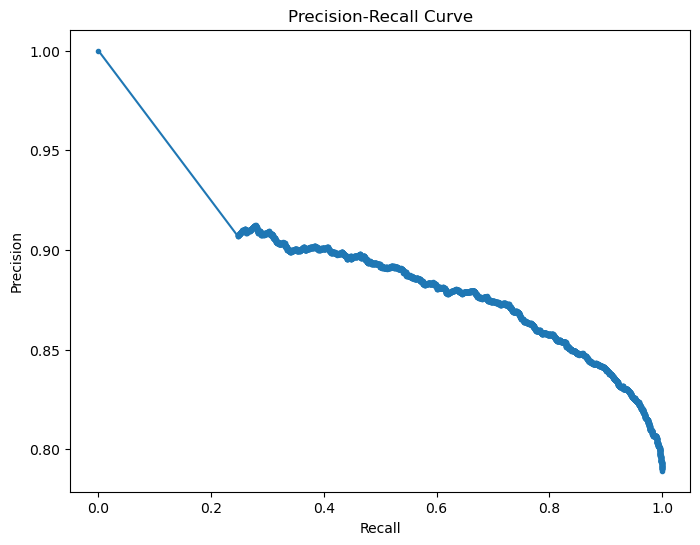

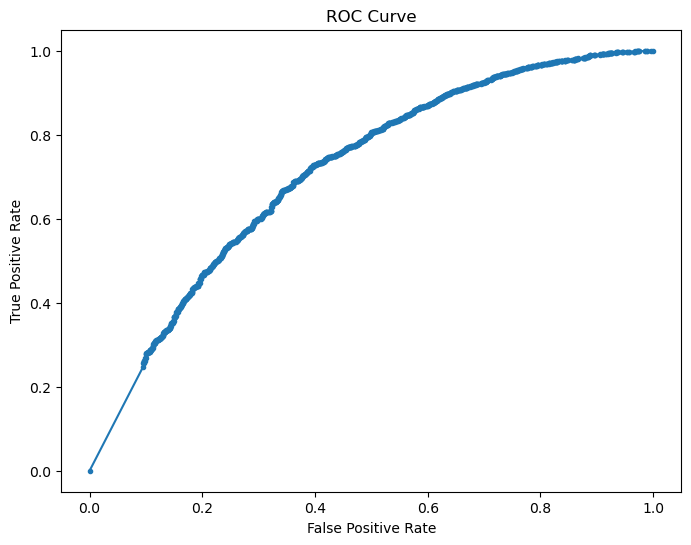

True Positive Rate: 0.9519535374868004
False Positive Rate: 0.7539525691699605
Precision: 0.8253604943923094


In [13]:
from sklearn.neighbors import KNeighborsClassifier

# 그리드 서치를 위한 하이퍼파라미터 후보군 정의
param_grid = {
    'n_neighbors': [3, 5, 7, 10],      # 이웃의 수 후보
    'weights': ['uniform', 'distance']  # 가중치 유형 후보
}

knn_binary = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn_binary, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("최적의 하이퍼파라미터:", grid_search.best_params_)

best_knn_binary = grid_search.best_estimator_
y_pred_binary = best_knn_binary.predict(X_test)

accuracy_bin = accuracy_score(y_test, y_pred_binary)
print(f"최적 모델의 정확도: {accuracy_bin}")


# 이진 분류 모델 평가 지표
conf_matrix_binary = confusion_matrix(y_test, y_pred_binary)
tn, fp, fn, tp = conf_matrix_binary.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
precision = precision_score(y_test, y_pred_binary)

# Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, best_knn_binary.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# ROC Curve
fpr_curve, tpr_curve, _ = roc_curve(y_test, best_knn_binary.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr_curve, tpr_curve)
plt.figure(figsize=(8, 6))
plt.plot(fpr_curve, tpr_curve, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print(f"True Positive Rate: {tpr}")
print(f"False Positive Rate: {fpr}")
print(f"Precision: {precision}")

In [14]:
knn_multi = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn_multi, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("최적의 하이퍼파라미터:", grid_search.best_params_)

best_knn_multi = grid_search.best_estimator_
y_pred_multi = best_knn_multi.predict(X_test)

accuracy_multi = accuracy_score(y_test, y_pred_multi)
print(f"최적 모델의 정확도: {accuracy_multi}")


# classification_report 출력
class_names = [str(i) for i in range(-1,95)]  # 각 클래스를 0부터 94까지의 문자열로 표현
report = classification_report(ym_test, y_pred_multi, target_names=class_names)
print("Classification Report:")
print(report)

최적의 하이퍼파라미터: {'n_neighbors': 10, 'weights': 'distance'}
최적 모델의 정확도: 0.803125
Classification Report:
              precision    recall  f1-score   support

          -1       0.58      0.25      0.35      1012
           0       0.00      0.00      0.00        32
           1       0.01      0.92      0.02        48
           2       0.00      0.00      0.00        38
           3       0.00      0.00      0.00        36
           4       0.00      0.00      0.00        36
           5       0.00      0.00      0.00        39
           6       0.00      0.00      0.00        33
           7       0.00      0.00      0.00        41
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00        27
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        48
          12       0.00      0.00      0.00        41
          13       0.00      0.00      0.00        47
          14       0.00      0.00  

C:\Users\bje57\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bje57\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bje57\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# svm

In [19]:
from sklearn.svm import SVC

# SVM 모델 생성
svm_binary = SVC(random_state=42)

# 그리드 서치를 위한 하이퍼파라미터 후보군 정의
param_grid = {
    'C': [1, 10],                 # C 값 후보
    'kernel': ['linear', 'rbf']  # 커널 종류 후보
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=svm_binary, param_grid=param_grid, cv=3, scoring='accuracy')

# 그리드 서치로 모델 피팅
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델로 예측
best_svm_binary = grid_search.best_estimator_
y_pred_binary = best_svm_binary.predict(X_test)

# 최적의 모델로 정확도 계산
accuracy_binary = accuracy_score(y_test, y_pred_binary)
print(f"최적 모델의 정확도: {accuracy_binary}")


# 이진 분류 모델 평가 지표
conf_matrix_binary = confusion_matrix(y_test, y_pred_binary)
tn, fp, fn, tp = conf_matrix_binary.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
precision = precision_score(y_test, y_pred_binary)

# Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, best_svm_binary.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# ROC Curve
fpr_curve, tpr_curve, _ = roc_curve(y_test, best_svm_binary.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr_curve, tpr_curve)
plt.figure(figsize=(8, 6))
plt.plot(fpr_curve, tpr_curve, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print(f"True Positive Rate: {tpr}")
print(f"False Positive Rate: {fpr}")
print(f"Precision: {precision}")





KeyboardInterrupt: 

In [ ]:
# SVM 모델 생성 및 학습
svm_multi = SVC(random_state=42)


# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=svm_multi, param_grid=param_grid, cv=3, scoring='accuracy')

# 그리드 서치로 모델 피팅
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델로 예측
best_svm_multi = grid_search.best_estimator_
y_pred_multi = svm_multi.predict(X_test)

# 최적의 모델로 정확도 계산
accuracy_multi = accuracy_score(y_test, y_pred_multi)
print(f"최적 모델의 정확도: {accuracy_multi}")


# classification_report 출력
class_names = [str(i) for i in range(-1,95)]  # 각 클래스를 0부터 94까지의 문자열로 표현
report = classification_report(ym_test, y_pred_multi, target_names=class_names)
print("Classification Report:")
print(report)

# med

In [ ]:
med = (med_c + med_o)

In [ ]:
max_length = max(max(len(arr) for arr in med), max(len(arr) for arr in med))

def pad_sequence(sequence, max_length):
    return sequence + [0] * (max_length - len(sequence))

med = [pad_sequence(arr, max_length) for arr in med]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(med, Yb, test_size=0.2, random_state=42)

In [ ]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(med, Ym, test_size=0.2, random_state=42)

# random forest

In [ ]:
rf_binary = RandomForestClassifier(random_state=42)

# 그리드 서치를 위한 하이퍼파라미터 후보군
param_grid = {
    'n_estimators': [50, 100],       # 트리 개수 후보
    'max_depth': [None],         # 최대 깊이 후보
    'min_samples_split': [2, 5],     # 노드 분할 최소 샘플 수
    'min_samples_leaf': [1]        # 리프 노드 최소 샘플 수
}

grid_search = GridSearchCV(estimator=rf_binary, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델로 예측
best_rf_binary = grid_search.best_estimator_
y_pred_binary = best_rf_binary.predict(X_test)

# 최적의 모델로 정확도 계산
accuracy_binary = accuracy_score(y_test, y_pred_binary)
print(f"최적 모델의 정확도: {accuracy_binary}")

# 이진 분류 모델 평가 지표
conf_matrix_binary = confusion_matrix(y_test, y_pred_binary)
tn, fp, fn, tp = conf_matrix_binary.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
precision = precision_score(y_test, y_pred_binary)

# Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, best_rf_binary.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# ROC Curve
fpr_curve, tpr_curve, _ = roc_curve(y_test, best_rf_binary.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr_curve, tpr_curve)
plt.figure(figsize=(8, 6))
plt.plot(fpr_curve, tpr_curve, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print(f"True Positive Rate: {tpr}")
print(f"False Positive Rate: {fpr}")
print(f"Precision: {precision}")


In [ ]:
rf_multi = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_multi, param_grid=param_grid, cv=3, scoring='accuracy')

# 그리드 서치로 모델 피팅
grid_search.fit(Xm_train, ym_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델로 예측
best_rf_multi = grid_search.best_estimator_
y_pred_multi = best_rf_multi.predict(Xm_test)

# 최적의 모델로 정확도 계산
accuracy_multi = accuracy_score(ym_test, y_pred_multi)
print(f"최적 모델의 정확도: {accuracy_multi}")

# classification_report 출력
class_names = [str(i) for i in range(-1, 95)]  # 각 클래스를 -1부터 94까지의 문자열로 표현
report = classification_report(ym_test, y_pred_multi, target_names=class_names)
print("Classification Report:")
print(report)

# knn

In [ ]:
# 그리드 서치를 위한 하이퍼파라미터 후보군 정의
param_grid = {
    'n_neighbors': [3, 5, 7, 10],      # 이웃의 수 후보
    'weights': ['uniform', 'distance']  # 가중치 유형 후보
}

knn_binary = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn_binary, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("최적의 하이퍼파라미터:", grid_search.best_params_)

best_knn_binary = grid_search.best_estimator_
y_pred_binary = best_knn_binary.predict(X_test)

accuracy_bin = accuracy_score(y_test, y_pred_binary)
print(f"최적 모델의 정확도: {accuracy_bin}")


# 이진 분류 모델 평가 지표
conf_matrix_binary = confusion_matrix(y_test, y_pred_binary)
tn, fp, fn, tp = conf_matrix_binary.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
precision = precision_score(y_test, y_pred_binary)

# Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, best_knn_binary.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# ROC Curve
fpr_curve, tpr_curve, _ = roc_curve(y_test, best_knn_binary.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr_curve, tpr_curve)
plt.figure(figsize=(8, 6))
plt.plot(fpr_curve, tpr_curve, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print(f"True Positive Rate: {tpr}")
print(f"False Positive Rate: {fpr}")
print(f"Precision: {precision}")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_multi = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn_multi, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("최적의 하이퍼파라미터:", grid_search.best_params_)

best_knn_multi = grid_search.best_estimator_
y_pred_multi = best_knn_multi.predict(X_test)

accuracy_multi = accuracy_score(y_test, y_pred_multi)
print(f"최적 모델의 정확도: {accuracy_multi}")


# classification_report 출력
class_names = [str(i) for i in range(-1,95)]  # 각 클래스를 0부터 94까지의 문자열로 표현
report = classification_report(ym_test, y_pred_multi, target_names=class_names)
print("Classification Report:")
print(report)

# svm

In [ ]:
# SVM 모델 생성
svm_binary = SVC(random_state=42)

# 그리드 서치를 위한 하이퍼파라미터 후보군 정의
param_grid = {
    'C': [0.1, 1, 10],                 # C 값 후보
    'kernel': ['linear', 'rbf', 'poly']  # 커널 종류 후보
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=svm_binary, param_grid=param_grid, cv=3, scoring='accuracy')

# 그리드 서치로 모델 피팅
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델로 예측
best_svm_binary = grid_search.best_estimator_
y_pred_binary = best_svm_binary.predict(X_test)

# 최적의 모델로 정확도 계산
accuracy_binary = accuracy_score(y_test, y_pred_binary)
print(f"최적 모델의 정확도: {accuracy_binary}")


# 이진 분류 모델 평가 지표
conf_matrix_binary = confusion_matrix(y_test, y_pred_binary)
tn, fp, fn, tp = conf_matrix_binary.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
precision = precision_score(y_test, y_pred_binary)

# Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, best_svm_binary.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# ROC Curve
fpr_curve, tpr_curve, _ = roc_curve(y_test, best_svm_binary.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr_curve, tpr_curve)
plt.figure(figsize=(8, 6))
plt.plot(fpr_curve, tpr_curve, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print(f"True Positive Rate: {tpr}")
print(f"False Positive Rate: {fpr}")
print(f"Precision: {precision}")





In [ ]:
# SVM 모델 생성 및 학습
svm_multi = SVC(random_state=42)


# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=svm_multi, param_grid=param_grid, cv=3, scoring='accuracy')

# 그리드 서치로 모델 피팅
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델로 예측
best_svm_multi = grid_search.best_estimator_
y_pred_multi = svm_multi.predict(X_test)

# 최적의 모델로 정확도 계산
accuracy_multi = accuracy_score(y_test, y_pred_multi)
print(f"최적 모델의 정확도: {accuracy_multi}")


# classification_report 출력
class_names = [str(i) for i in range(-1,95)]  # 각 클래스를 0부터 94까지의 문자열로 표현
report = classification_report(ym_test, y_pred_multi, target_names=class_names)
print("Classification Report:")
print(report)